# Assignment 4 - Unsupervised Learning and Neural Networks

## *Joseph Krinke*
Netid: jdk61

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedfeed_forward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random


def kmeans(X, k, max_steps, convergence_threshold, seed):
    mean_change = 10^10
    steps = 0
    np.random.seed(seed)
    #Select k points from the data randomly to use as initial means/centroids
    
    rand_indices_k = np.random.randint(0, X.shape[0], size = k)
    means = X[rand_indices_k, :]
    
    #Continue moving the centroids until the model converges or reaches the maximum number of iterations.
    while (steps < max_steps):
        #Create lists to hold each set of variables to be returned by the function.
        new_means = []
        min_distances = []
        class_dict = {}
        class_assignment = []
        #Begin by randomly assigning classes from 1 to k. 
        for i in range(X.shape[0]):
            class_dict[i] = []
        
        #Calculate distances from each point to the centroid and reassign classes.
        for obs in X:
            dissimilarity = [np.linalg.norm(obs - centroid) for centroid in means]
            min_cluster = dissimilarity.index(min(dissimilarity))
            min_distances.append(dissimilarity[min_cluster])
            class_assignment.append(min_cluster)
            class_dict[min_cluster].append(obs)

        
        #Re-calculate the centroids/means using the new class assignments. 
        for classes in class_dict:
            new_means.append(np.average(class_dict[classes], axis = 0))
            
        #Determine convergence by checking if centroids have changed.
        for i in range(k):
            original_centroid = means[i]
            new_centroid = new_means[i]
            if np.all(new_centroid == original_centroid):
                return(means, class_assignment, mean_distance)
            
        #Increase the number of steps.
        steps += 1
    #Calculate metric for evaluating the clusters
    mean_distance = np.mean(min_distances)
    return(means, class_assignment, mean_distance)
    

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**ANSWER**

The elbows in each curve are located at the actual number of clusters in each dataset. The dataset created with 2 centers has the elbow at 2 and the dataset created with 5 centers has the elbow at 5. This is because the marginal benefit of adding additional clusters drops once you exceed the "true" number of clusters. 

In [2]:
from sklearn.datasets import make_blobs

#Generating data to test algorithm.

x2, y2 = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=0, cluster_std=1)

x5, y5 = make_blobs(n_samples=5000, centers=5, n_features=2, random_state=0, cluster_std=1)


In [3]:
#Create functions to plot the elbow curves. 
def gen_elbow_curve(data, max_clusters, iterations,seed):
    dissimilarity = []
    for i in range(1,max_clusters+1):
        dissimilarity.append(kmeans(data,i,iterations,1,seed)[2])
    return(dissimilarity)
def plt_elbow(data, max_clusters, title, iterations, seed):
    dissimilarity = gen_elbow_curve(data, max_clusters, iterations,seed)
    dim=np.arange(1,max_clusters+1,1)
    plt.plot(np.append(np.roll(dissimilarity,1),dissimilarity[max_clusters-2]))
    plt.xlim(1, max_clusters)
    plt.xticks(dim)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Error')
    plt.title(title)
    plt.show()

C:\Users\Joe Krinke\Anaconda3\lib\site-packages\numpy\lib\function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Joe Krinke\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


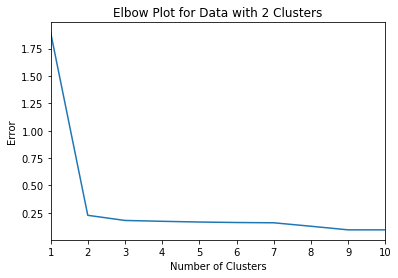

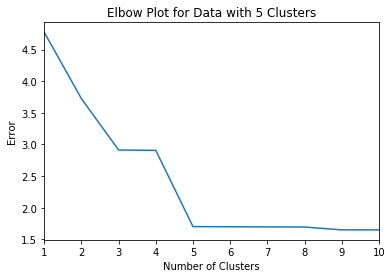

In [4]:
#Plotting elbow curves 
plt_elbow(x2,10, "Elbow Plot for Data with 2 Clusters",20,5)
plt_elbow(x5,10, "Elbow Plot for Data with 5 Clusters", 20,1)

In [75]:
#Create function to generate graph that contains original clusters and new cluster assignments. 
colors = ['red','blue','green', 'purple', 'orange']
def cluster_plot(X, true_label, cluster_label, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
    ax1.scatter(X[:,0], X[:,1], c= true_label, cmap= matplotlib.colors.ListedColormap(colors))
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_title("True Class Assignment")
    ax2.scatter(X[:,0], X[:,1], c = cluster_label, cmap = matplotlib.colors.ListedColormap(colors))
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_title('K-means Clustering Class Assignment')
    plt.suptitle(title)
    plt.show()

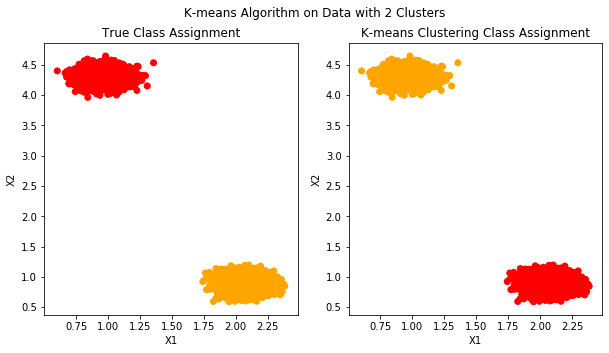

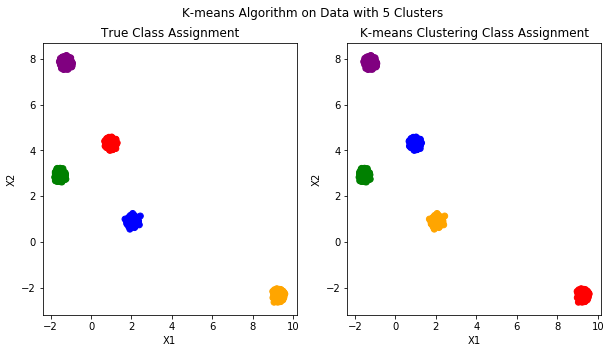

In [76]:
#Plotting clustered graphs for each dataset along with the original cluster assignments. 
cluster_plot(x2, y2, kmeans(x2, 2, 10, 1,1)[1], 'K-means Algorithm on Data with 2 Clusters')
cluster_plot(x5, y5,kmeans(x5, 5,20, 1,6)[1], "K-means Algorithm on Data with 5 Clusters")

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.



1) K means clustering works by assigning each point the class with the centroid that is the minimum distance from that point. Initial centroids/means are randomly assigned and then recalculated as the mean of the set of points in that class until the model converges. 

2) Agglomerative clustering starts with each point as an individual cluster and progressively merges points/clusters to form new clusters based on a distance metric (such as MIN, MAX, or group average). This process is repeated until only a single cluster containing all of the data remains. This nested structure produces a dendrogram that you can examine to manually select the number of clusters.

3) A gaussian mixture model works by first producing k randomly generated gaussian distributions in space. The probability of each point being a member of each cluster k is calculated using the corresponding gaussian. Points are assigned the cluster/class that they "most likely" are a member of. Once the new classes are assigned the parameters for the gaussian associated with each cluster are re-calculated and the process repeats again. Gaussian mixture models are unique in that they produce soft clustering and perform well with data that has correlated features.



4) DBSCAN begins by calculating the number of points within a given distance from each point. This number is used to classify observations as being core, border, or noise points. First, neighboring core points are grouped together to form clusters. After this initial clustering all border points are assigned to a cluster based on their neighboring core points. This algorithm is robust to outliers and can create arbitrarily shaped clusters. 

5) Spectral clustering starts by calculating a matrix containing the affinity (closeness/opposite of distance) of each point from each other point. The eigenvectors and eigenvalues of this matrix are calculated in order to reduce the dimensionality of the data. A clustering algorithm, such as k-means, is then applied to the lower-dimensional data. This algorithm can produce good clustering results but can be slow on large datasets. 

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

In [3]:
#Importing data 
aggregation = np.loadtxt('Aggregation.txt', delimiter='\t')
compound = np.loadtxt('Compound.txt', delimiter='\t')
D31 = np.loadtxt('D31.txt', delimiter='\t')
jain = np.loadtxt('jain.txt', delimiter='\t')

#Creating dictionary with cluster numbers and data to be iterated over 
datasets = {7:aggregation, 6:compound , 31:D31, 2:jain}
raw_data = [aggregation, compound, D31, jain]


In [4]:
from sklearn.cluster import SpectralClustering, DBSCAN, KMeans,AgglomerativeClustering
from sklearn.mixture import GaussianMixture


#Define function that applies each clustering algorithm on each dataset

def multi_cluster(X, col_num, n_clust):
    data = X[:,:col_num]
    
    #Spectral CLustering
    spec_clust_label = SpectralClustering(n_clusters= n_clust, assign_labels="discretize", random_state=0).fit_predict(data)
    
    #DBSCAN
    db_clust_label = DBSCAN(eps=3, min_samples=2).fit_predict(data)
    
    #Kmeans
    k_clust_label = KMeans(n_clusters = n_clust).fit_predict(data)
    
    #Gaussian Mixture Model
    gauss_clust_label = GaussianMixture(n_components = n_clust).fit_predict(data)
    
    #Agglomerative model
    agg_clust_label = AgglomerativeClustering(n_clusters = n_clust).fit_predict(data)
    
    
    return(k_clust_label, agg_clust_label, gauss_clust_label, db_clust_label, spec_clust_label)
    

In [5]:
#Iterate over each dataset to apply the clustering function to data
class_assignments = []
for num_clust, data in datasets.items(): 
    class_assignments.append(multi_cluster(data, 2, num_clust))
    


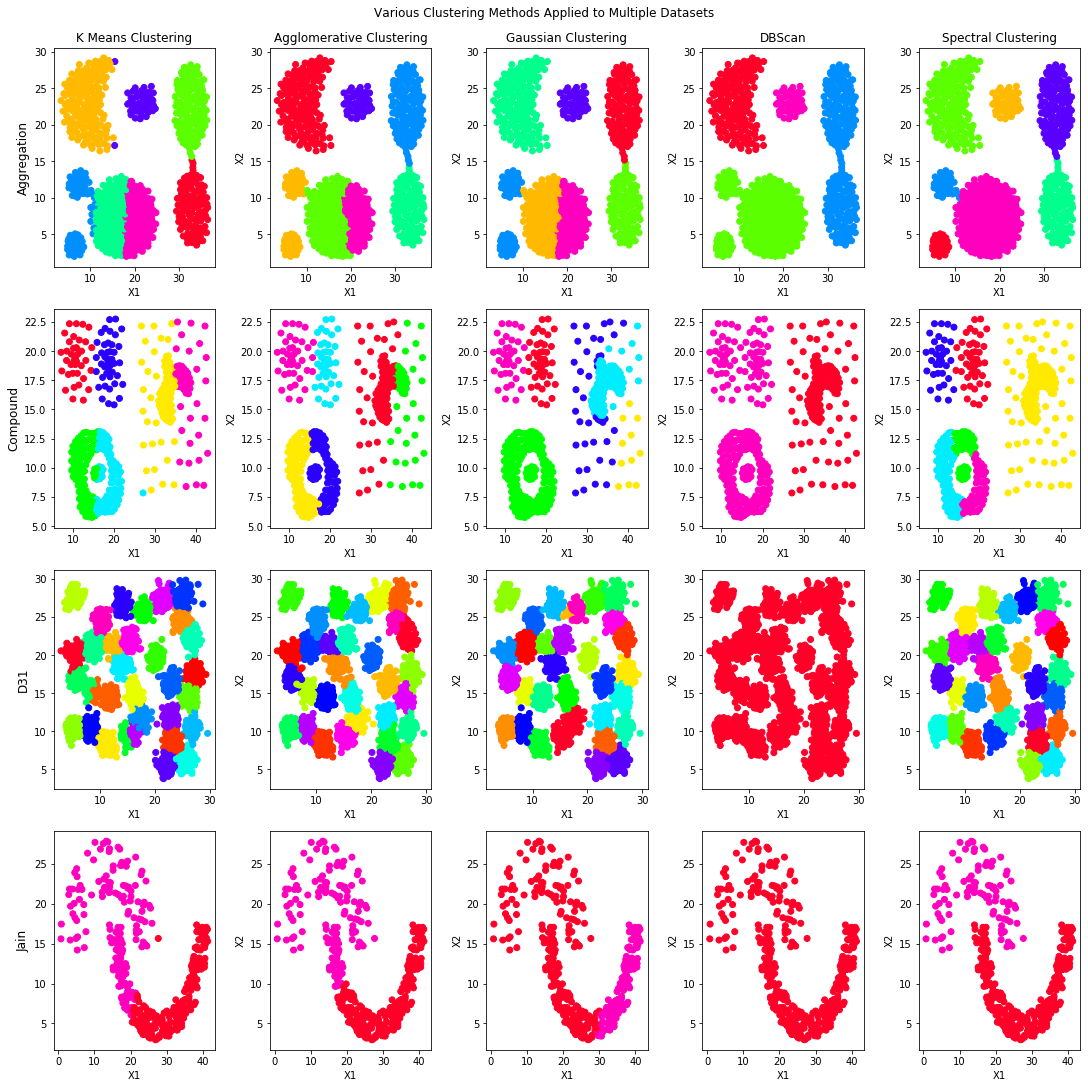

In [10]:
from matplotlib.pyplot import cm
#Create figure to hold the output of each dataset and clustering technique
col_labels = ['K Means Clustering', 'Agglomerative Clustering', 'Gaussian Clustering', 'DBScan', 'Spectral Clustering']
row_labels = ['Aggregation', 'Compound', 'D31', 'Jain']

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15),constrained_layout=True)

#Generating colors to color individual clusters
cm = plt.get_cmap('gist_rainbow')


for ax, col in zip(axes[0], col_labels):
    ax.set_title(col)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

for ax, row in zip(axes[:,0], row_labels):
    ax.set_ylabel(row, rotation=90, size='large')

#Iterate over the predictions and data and plot on the graph
for i in range(len(class_assignments)): #Iterate over datasets 
    for j in range(5): #Iterate over model predictions for each dataset
        axes[i,j].scatter(raw_data[i][:,0], raw_data[i][:,1], c = class_assignments[i][j], cmap = cm)
        axes[i,j].set_xlabel('X1')
        if (j != 0):
            axes[i,j].set_ylabel('X2')

plt.suptitle('Various Clustering Methods Applied to Multiple Datasets')
plt.show()

**Evaluating Algorithm Performance**

Aggregation Data: Spectral Clustering works the best on the aggregation data. It works well because it takes the cluster number as a parameter and can account for the connectedness of the rightmost cluster. It knows to "cut" the right two clusters apart. 


Compound Data: Agglomerative clustering works the best on the compound dataset. It separates the data in the bottom left and upper right corners into clusters that appear reasonable. This could be due to the fact that the clusters are formed in a hierarchical manner- this helps prevent the overlapping and oddities observed in the first, third, and fifth columns.

D31 Data: The clusters in this dataset are pretty tightly packed together. The main challenge here is determining the correct number of clusters, not determining the shape or points within each cluster. DBScan performs terribly here and thinks all of the data is one cluster. All of the other clustering techniques produce very similar results, as the number of clusters is specified. 

Jain Data: Spectral clustering works the best on this data. Similar to the aggregation dataset, the clusters in this data are more defined by continuity rather than proximity. 

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).


Using TensorFlow backend.


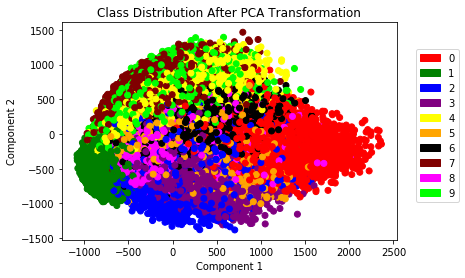

In [11]:
from keras.datasets import mnist
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches

#Loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Converting data into a format usable in PCA. 
a,b,c = X_train.shape
X_reshape = X_train.reshape(a, b*c)

#Applying PCA 
pca = PCA(n_components=2)
PCA_Data = pca.fit_transform(X_reshape)

#Visualizing PCA results 
colors = ['red','green','blue','purple', 'yellow','orange', 'black', 'maroon', 'fuchsia', 'lime']
plt.scatter(PCA_Data[:,0], PCA_Data[:,1], c=y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Class Distribution After PCA Transformation')

#Generating legend using colors
legend_color = []
number = 0
for i in colors:
    legend_color.append(mpatches.Patch(color=i, label = str(number)))
    number+=1
plt.legend(handles = legend_color, bbox_to_anchor=(1.2, .9))

plt.show()





**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

83% of the variance in the data is unexplained by the first two principal components. This would negatively impact the clustering of the data as there isn't enough variability to produce good clusters- the first two components aren't enough to fully describe the data. 

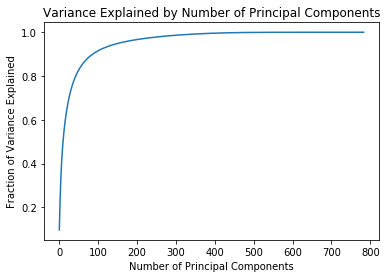

The fraction of variance unexplained by the first two principal components is 0.83.


In [13]:
#Calculating amount of explained variance by the principal components
pca_full = PCA()
pca_full.fit(X_reshape)
explained_variance = pca_full.explained_variance_ratio_

#Calculate the cumulative sum of the explained variance
cumulative_variance = np.cumsum(explained_variance)

#Graphing amount of explained variance
plt.plot(cumulative_variance)
plt.ylabel('Fraction of Variance Explained')
plt.xlabel('Number of Principal Components')
plt.title('Variance Explained by Number of Principal Components')
plt.show()

#Calculating amount of UNEXPLAINED variance by the first two principal components
print('The fraction of variance unexplained by the first two principal components is {:0.2f}.'.format(1-cumulative_variance[1]))


**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

(15000, 784)


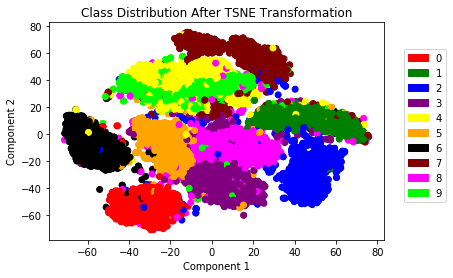

In [24]:
from sklearn.manifold import TSNE
#Reducing the dimensionality of the data with t-sne. Subset the data by half to reduce computation time.
#I ran t-SNE once on everything and it took far too long. Calculating that similarity matrix is very expensive. 

X_subset=X_reshape[:15000]
print(X_subset.shape)
X_tsne = TSNE(n_components=2, perplexity=50,early_exaggeration=12).fit_transform(X_subset)

colors = ['red','green','blue','purple', 'yellow','orange', 'black', 'maroon', 'fuchsia', 'lime']
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_train[:15000], cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Class Distribution After TSNE Transformation')

#Generating legend using colors
legend_color = []
number = 0
for i in colors:
    legend_color.append(mpatches.Patch(color=i, label = str(number)))
    number+=1
plt.legend(handles = legend_color, bbox_to_anchor=(1.2, .9))

plt.show()

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

The TSNE technique appeared to cluster the data best. The clusters produced by TSNE were much more distinct and compact than the clusters produced by PCA. The PCA clusters were much more heterogenous and had less clear boundaries between classes.

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to debug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
class Neural_Network(object):

    def __init__(self,epochs=1000):
        # Sets up neural network layers
        np.random.seed(9)
        self.inputLayerSize = 2      
        self.hiddenLayerSize1 = 100    
        self.hiddenLayerSize2 = 100
        self.outputLayerSize = 1     
        self.learningRate = 0.01      
        
        self.epochs = epochs

        # Initialize weights to random values
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize1)
        self.W2 = np.random.randn(self.hiddenLayerSize1,self.hiddenLayerSize2)
        self.W3 = np.random.randn(self.hiddenLayerSize2,self.outputLayerSize)

    # Feedfeed_forward Function
    def feed_forward(self, X):
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.sigmoid(self.z3)
        
        self.z4 = np.dot(self.a3,self.W3)
        self.yHat = self.sigmoid(self.z4)
        return self.yHat
    
    def predict(self,X, thresh):
        # Propogate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = np.dot(self.a2,self.W2)
        self.a3 = self.sigmoid(self.z3)
        
        self.z4 = np.dot(self.a3,self.W3)
        self.yHat = self.sigmoid(self.z4)
        preds = self.yHat
        preds[preds >= thresh] = 1
        preds[preds < thresh] = 0
        return self.yHat

    def predict_proba(self, X):
        # Propogate inputs through network
        return self.predict(self,X)

    # Activation Function
    def sigmoid(self,z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))

    # Derivative of sigmoid function function
    def sigmoid_derivative(self,z):
        return np.multiply((self.sigmoid(z)) , np.subtract(1,self.sigmoid(z)) )

    # Backpropgation Function
    def backpropagation(self,X,y):
        # Backpropagates error from learned values
        self.yHat = self.feed_forward(X)
        delta4 = np.multiply((y-self.yHat), self.sigmoid_derivative(self.z4))
        djdW3 = np.dot(self.a3.T,delta4)
        self.W3 += djdW3*self.learningRate
        
        delta3 = np.multiply(np.dot(delta4,self.W3.T),self.sigmoid_derivative(self.z3))
        djdW2 = np.dot(self.a2.T,delta3)
        self.W2 += djdW2*self.learningRate

        delta2 = np.multiply(np.dot(delta3,self.W2.T),self.sigmoid_derivative(self.z2))
        djdW1 = np.dot(X.T,delta2)
        self.W1 += djdW1*self.learningRate
    # Calculates the error of the neural network
    def error(self,X,y):
        self.yHat = self.feed_forward(X)
        E = 0.5*np.mean((np.square(y-self.yHat)))
        return E
    
    def fit(self,X,y, x_val, y_val, epochs, learning_rate,validation_error = True):
        self.learningRate = 0.01
        self.epochs = epochs
        train_error = []
        val_error = []
        #Shuffle list so you get random x & y values
        indices = np.random.choice(X.shape[0], X.shape[0], replace=False)
        #Iterate over whole data set for each epoch
        for i in range(self.epochs):
            for j in indices:
                X_random = X[j].reshape(1,2)
                y_random = y[j].reshape(1,1)
                self.backpropagation(X_random,y_random)
            train_error.append(self.error(X,y))
            val_error.append(self.error(x_val,y_val))
        if(validation_error):
            return(train_error, val_error)
        else:
            return(train_error)
            
                



**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier
#Generate data
X, y = make_moons(600, noise=0.20)
X_val, y_val = make_moons(100, noise=0.20)
y = y.reshape(-1,1)
#Subset into training and validation
XTrain = X[:500]
yTrain = y[:500]
X_val = X[500:]
y_val = y[500:]

In [43]:
#Fit the neural network model
neural_test = Neural_Network(.001)
a,b = neural_test.fit(X, y, X_val, y_val,150, .001, True)

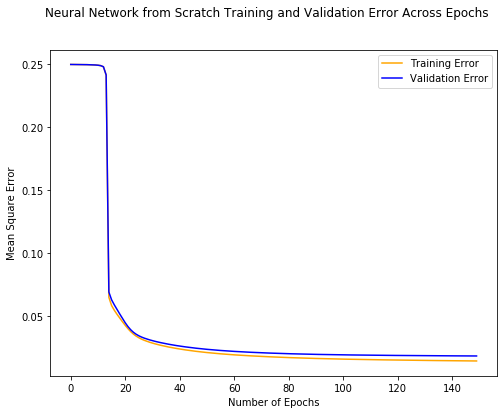

In [44]:
#Plot training and validation performance
# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(8, 6))
#Plot lines
ax.set_xlabel('Number of Epochs')
ax.set_ylabel('Mean Square Error')
ax.plot(a,color="orange", label="Training Error")
ax.plot(b, color="blue", label="Validation Error")
plt.suptitle("Neural Network from Scratch Training and Validation Error Across Epochs")
ax.legend()
plt.show()

In [45]:
#Function to plot decision region
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def plot_Decision(XTrain, yTrain, X_val, y_val, model_,title):
    cmap_dark = ListedColormap(['#FF0000', '#0000FF'])
    cmap_light = cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    h = 0.02
    xx,yy = np.meshgrid(np.arange(-50,50),np.arange(-50,50))

    X_ = XTrain
    Y_ = yTrain
    x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
    y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    xx_ = np.c_[xx.ravel(), yy.ravel()]
    Z = model_.feed_forward(xx_)

    Z = Z.reshape(xx.shape)
    #Plot training 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,10))
    ax1.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax1.scatter(X_[:, 0], X_[:, 1], c=Y_.flatten(), cmap=cmap_dark)
    ax1.set_xlim(xx.min(), xx.max())
    ax1.set_ylim(yy.min(), yy.max())
    ax1.set_xlabel("x1")
    ax1.set_ylabel("x2")
    ax1.set_title("Neural Network Decision Region and Training Data")
    #Repeat for validation 
    ax2.pcolormesh(xx, yy, Z, cmap=cmap_light)
    ax2.scatter(X_val[:, 0], X_val[:, 1], c=y_val.flatten(), cmap=cmap_dark)
    ax2.set_xlim(xx.min(), xx.max())
    ax2.set_ylim(yy.min(), yy.max())
    ax2.set_xlabel("x1")
    ax2.set_ylabel("x2")
    ax2.set_title("Neural Network Decision Region and Validation Data")
    #Create patches for legend 
    red_patch = mpatches.Patch(color='red', label='Class 1')
    blue_patch = mpatches.Patch(color='blue', label='Class 0')
    fig.legend(handles=[red_patch,blue_patch])
    plt.suptitle("Decision Boundary of Neural Network From Scratch")
    plt.show()

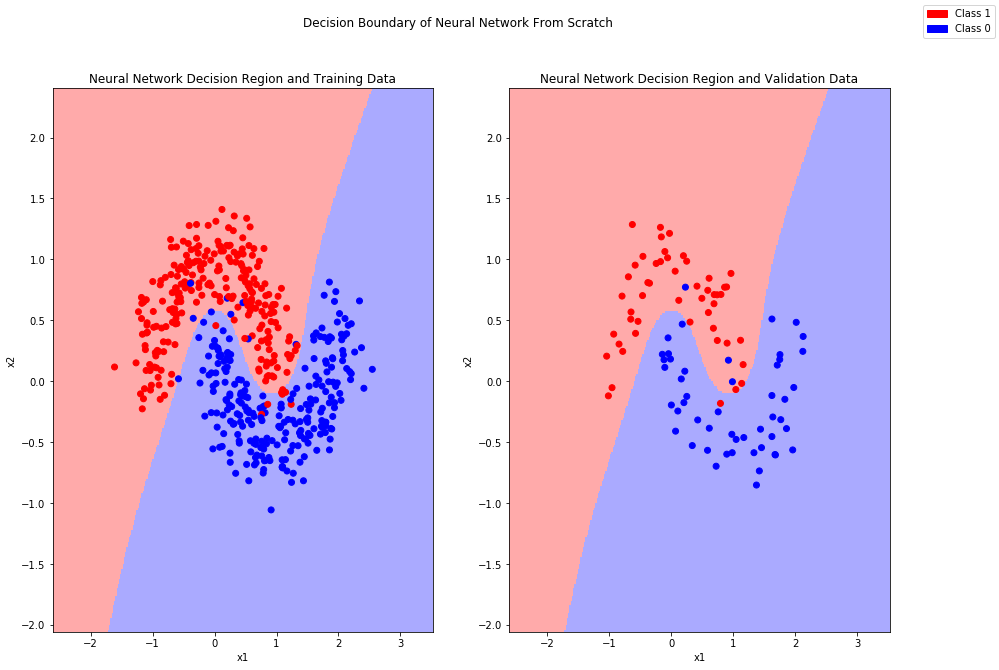

In [46]:
#Plot decision boundary
plot_Decision(XTrain, yTrain, X_val, y_val, neural_test,"Scratch Neural Network Decision Boundary on Training and Validation Data")

One point I'd like to note- the sklearn classifier is slightly different than the neural network I coded. 
The default parameters for the MLP classifier include differences such as automatically determined batch sizes, non-constant learning rates, and momentum, just to name a few. I've tried to make things as identical as possible. While it may seem that my model is performing "better" on the validation set than the MLP, it may just be that something behind the scenes is constraining the speed of fitting.


Stochastic Gradient Descent: https://scikit-learn.org/stable/modules/sgd.html

Multi-layer Perceptron Models: https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron

In [67]:
from sklearn.neural_network import MLPClassifier
#Fit sklearn classifier with sigmoid activations, two hidden layers of size 100, 150 max interations, and a constant learning rate of .01. 
classifier = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=150, learning_rate_init =.01, activation = 'logistic',random_state=123, solver='sgd', learning_rate='constant',batch_size=1, nesterovs_momentum=False)
classifier.fit(XTrain, yTrain.ravel())

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=1, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.01, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=False, power_t=0.5,
              random_state=123, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
def roc_curve_plot(model1,model2, X,Y, title1, title2):
    probs1 = model1.feed_forward(X)
    probs2 = model2.predict_proba(X)[:,1]
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y, probs1)
    false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y, probs2)
    print('AUC for '+title1+":", roc_auc_score(Y,probs1))
    print('AUC for '+title2+":", roc_auc_score(Y,probs2))
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
    ax1.set_title(title1)
    ax1.plot(false_positive_rate1, true_positive_rate1)
    ax1.plot([0, 1], ls="--")
    ax1.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlabel('False Positive Rate')
    ax2.set_title(title2)
    ax2.plot(false_positive_rate2, true_positive_rate2)
    ax2.plot([0, 1], ls="--")
    ax2.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    ax2.set_ylabel('True Positive Rate')
    ax2.set_xlabel('False Positive Rate')
    plt.suptitle("ROC Curves for the Scratch Neural Network and the Sklearn Classifier")
    plt.show()
    


AUC for Neural Network From Scratch: 0.992
AUC for Sklearn Classifier: 0.9428


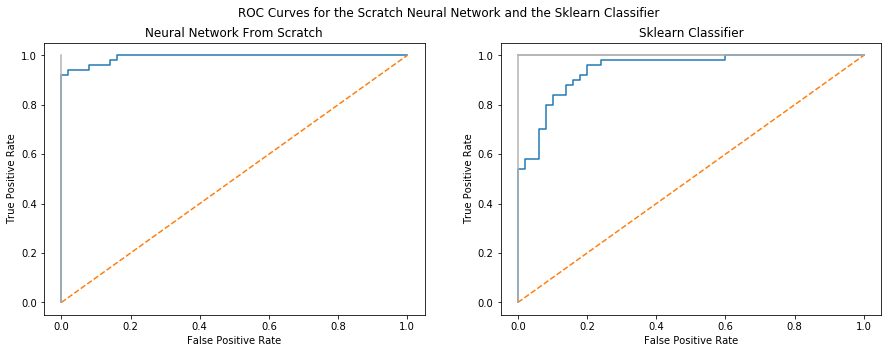

In [66]:
#Compare sklearn classifier to my classifier on validation data.
roc_curve_plot(neural_test,classifier, X_val, y_val, "Neural Network From Scratch", "Sklearn Classifier")

**(c)** Suggest two ways in which your neural network implementation could be improved.

My neural network could allow for different activation functions like relu or tanh. Additionally, it could have regularization or allow for dynamic learning rates. 